In [91]:
import pandas as pd
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
dfs=pd.read_excel('D:\Documentos\Github\Prueba_tecnica_Azzorti\BASES_MODELO.xlsx',sheet_name=None)

In [92]:
df_bases_variables=dfs['BASE_VARIABLES']
df_bases_estimados=dfs['BASE_ESTIMADOS']
df_bases_asesoras=dfs['BASE_ASESORA']
def union(df1,df2,columnaunion=""):
    common=[]
    for i in df1.columns:
        if i in df2.columns:
            common.append(i)
    if columnaunion:
        df_merge=df1.merge(df2,how="inner",on=columnaunion)   
    else:
        df_merge=df1.merge(df2,how="inner",on=common)
    return df_merge
df=union(df_bases_variables,df_bases_estimados)
df=union(df,df_bases_asesoras)
df["CAMPANA"].unique()

array([201902, 201908, 201910, 201907, 201903, 201906, 201905, 201912,
       201904, 201911, 201909, 201901], dtype=int64)

# **EDA**

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CAMPANA               5817 non-null   int64 
 1   CODIGO_DEL_PRODUCTO   5817 non-null   object
 2   VENTA                 5817 non-null   int64 
 3   VENTA_ZONA_101        5817 non-null   int64 
 4   VENTA_ZONA_102        5817 non-null   int64 
 5   VENTA_ZONA_103        5817 non-null   int64 
 6   VENTA_ZONA_104        5817 non-null   int64 
 7   VENTA_ZONA_107        5817 non-null   int64 
 8   VENTA_ZONA_109        5817 non-null   int64 
 9   VENTA_ZONA_110        5817 non-null   int64 
 10  VENTA_ZONA_111        5817 non-null   int64 
 11  VENTA_ZONA_112        5817 non-null   int64 
 12  VENTA_ZONA_115        5817 non-null   int64 
 13  VENTA_ZONA_116        5817 non-null   int64 
 14  VENTA_ZONA_119        5817 non-null   int64 
 15  NOMB_SUBGRUPO         5817 non-null   

In [94]:
df.columns

Index(['CAMPANA', 'CODIGO_DEL_PRODUCTO', 'VENTA', 'VENTA_ZONA_101',
       'VENTA_ZONA_102', 'VENTA_ZONA_103', 'VENTA_ZONA_104', 'VENTA_ZONA_107',
       'VENTA_ZONA_109', 'VENTA_ZONA_110', 'VENTA_ZONA_111', 'VENTA_ZONA_112',
       'VENTA_ZONA_115', 'VENTA_ZONA_116', 'VENTA_ZONA_119', 'NOMB_SUBGRUPO',
       'TALLA', 'PRECIO_NAC', 'CANTIDADES_ESTIMADAS', 'N° ASESORAS_ZONA_101',
       'N° ASESORAS_ZONA_102', 'N° ASESORAS_ZONA_103', 'N° ASESORAS_ZONA_104',
       'N° ASESORAS_ZONA_107', 'N° ASESORAS_ZONA_109', 'N° ASESORAS_ZONA_110',
       'N° ASESORAS_ZONA_111', 'N° ASESORAS_ZONA_112', 'N° ASESORAS_ZONA_115',
       'N° ASESORAS_ZONA_116', 'N° ASESORAS_ZONA_119', 'N° ASESORAS'],
      dtype='object')

In [95]:
print(df.describe())

             CAMPANA         VENTA  VENTA_ZONA_101  VENTA_ZONA_102  \
count    5817.000000   5817.000000     5817.000000     5817.000000   
mean   201906.420148   3590.018566      130.017019      104.457796   
std         3.308766   3332.512574      185.582451      136.130799   
min    201901.000000     25.000000        0.000000        0.000000   
25%    201904.000000   1428.000000        0.000000        0.000000   
50%    201906.000000   2639.000000       76.000000       64.000000   
75%    201909.000000   4620.000000      178.000000      152.000000   
max    201912.000000  34645.000000     4001.000000     1588.000000   

       VENTA_ZONA_103  VENTA_ZONA_104  VENTA_ZONA_107  VENTA_ZONA_109  \
count     5817.000000     5817.000000     5817.000000     5817.000000   
mean        85.258037       41.903559       82.692969       73.810727   
std        169.428516       68.880400      152.490673      132.110460   
min          0.000000        0.000000        0.000000        0.000000   
25% 

In [96]:
df.describe(include=["O"])

,CODIGO_DEL_PRODUCTO,NOMB_SUBGRUPO,TALLA
count,5817,5817,5817
unique,5817,21,13
top,P00845,201 RE-BLUSAS FEM,T-M
freq,1,1475,1078


In [97]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


# Panorama

#### **1. Tipos de datos y conteo de valores no nulos:**
- El dataset contiene **5810 entradas** y **31 columnas**.
- **Tipos de Datos**: Hay 28 columnas de `int64` como tipo de dato y 3 columnas con `object` como tipo de dato.
  - **Características Numéricas**: Esto incluye características como `CAMPANA`, `VENTA`, `VENTA_ZONA_10#`, etc.
  - **Características Categóricas**: Incluyen `CODIGO_DEL_PRODUCTO`, `NOMB_SUBGRUPO` y `TALLA`.

#### **2. Estadísticas Descriptivas:**
- **Características Numéricas**:
  - La variable objetivo `VENTA` tiene una media de **3590** con una desviación estándar de **3332**, indicando una dispersión significativa en la cantidad de ventas.
  - `CANTIDADES_ESTIMADAS` tiene una media de **3590** con una desviación estándar de **5625**, indicando una dispersión significativa en las cantidades estimadas.
  - `CAMPANA` varía de **201901 a 201912**, lo que, considerando que indica el número de campaña en el año, debería ser una característica categórica.
  - `N°ASESORAS` tiene una media de **24856** con una desviación estándar de **1385**, indicando una baja dispersión.

- **Características Categóricas**:
  - **`CODIGO_DEL_PRODUCTO`** tiene **5817 valores únicos**.
  - **`NOMB_SUBGRUPO`** es mayormente `201 RE-BLUSAS FEM` (Blusas femeninas), con **1475 de frecuencia**, sugiriendo su importancia para la predicción.
  - **`TALLA`** es mayormente `T-M` (talla M), con **1078 de frecuencia**, sugiriendo su importancia para la predicción.
## **Problemas a Abordar Más Adelante**

1. **Detección y Manejo de Valores Atípicos:**
   - Características como `VENTA`, `CANTIDADES_ESTIMADAS` muestran una alta variabilidad, lo que podría indicar la presencia de valores atípicos. Se debe analizar su impacto y decidir si eliminarlos o transformarlos.

3. **Codificación  y transformacion de Variables Categóricas:**
   - la variable `CAMPANA` debe ser transformada a una variable categorica
  - Variables como `NOMB_SUBGRUPO`, `TALLA` y `CODIGO_DEL_PRODUCTO` tienen múltiples valores únicos. Se debe determinar el método de codificación       más adecuado, como:
     - **One-hot encoding** si hay pocas categorías relevantes.
     - **Label encoding** si hay un orden implícito en los valores.
     - **Frequency encoding** si la frecuencia de aparición es un factor relevante para la predicción.

4. **Ingeniería de Características:**
   - Se pueden generar nuevas características combinando información relevante, como:
     - Crear variables agregadas para analizar tendencias de ventas por `CAMPANA`.
     - Transformaciones para reducir sesgos en distribuciones numéricas.

5. **Correlación y Multicolinealidad:**
   - Algunas variables pueden estar altamente correlacionadas, como aquellas relacionadas con zonas de venta y número de asesoras. Se debe realizar un análisis de correlación para identificar y reducir la multicolinealidad antes del modelado.



In [110]:
from analisis.funciones import univariadonumerico

ImportError: cannot import name 'univariadonumerico' from 'analisis.funciones' (d:\Documentos\Github\Prueba_tecnica_Azzorti\analisis\funciones.py)

In [79]:
univariadonumerico(df,"VENTA")

NameError: name 'univariadonumerico' is not defined

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


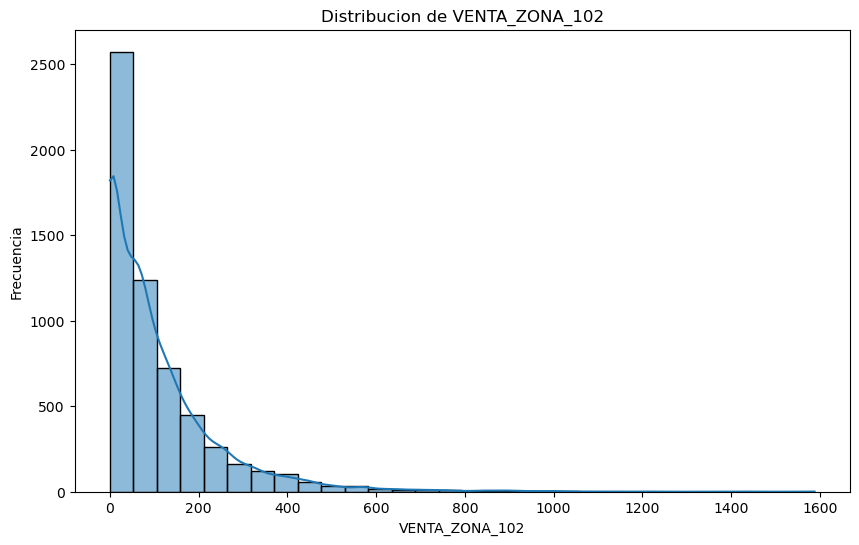

In [74]:
univariado(df,"VENTA_ZONA_102")

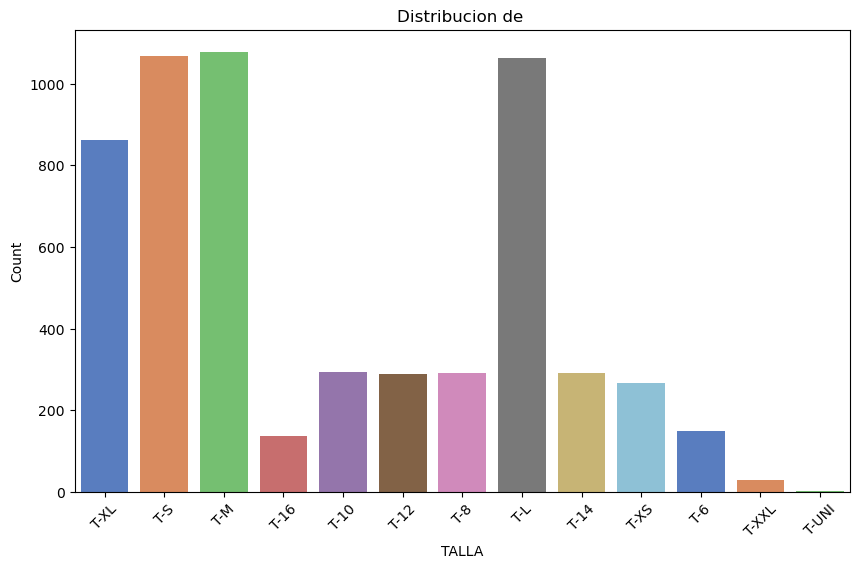

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x="TALLA", data=df, palette="muted")
plt.title("Distribucion de ")
plt.xlabel("TALLA")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

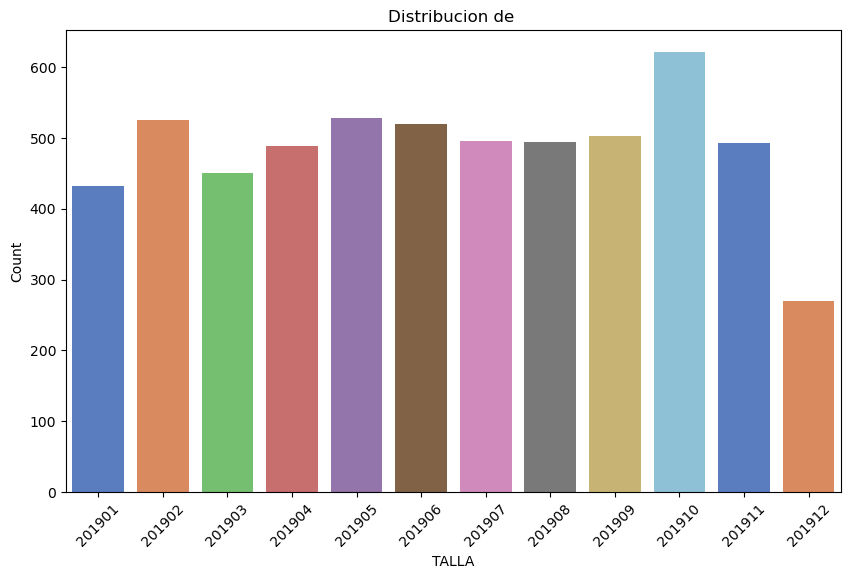

In [ ]:
#df["CAMPANA"]=df["CAMPANA"].astype(object)
plt.figure(figsize=(10, 6))
sns.countplot(x="CAMPANA", data=df, palette="muted")
plt.title("Distribucion de ")
plt.xlabel("TALLA")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

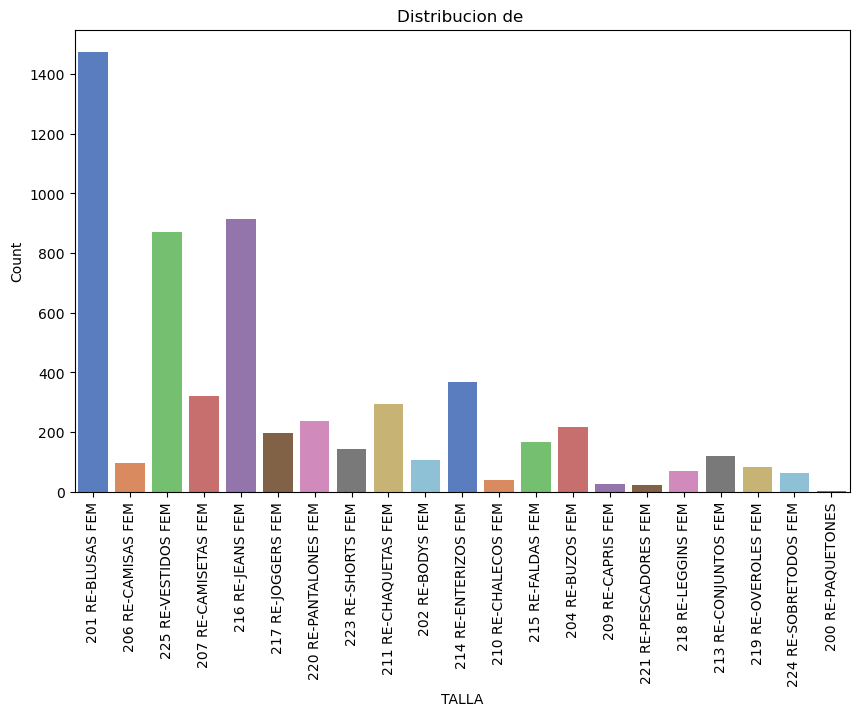

In [ ]:
#df["CAMPANA"]=df["CAMPANA"].astype(object)
plt.figure(figsize=(10, 6))
sns.countplot(x="NOMB_SUBGRUPO", data=df, palette="muted")
plt.title("Distribucion de ")
plt.xlabel("TALLA")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

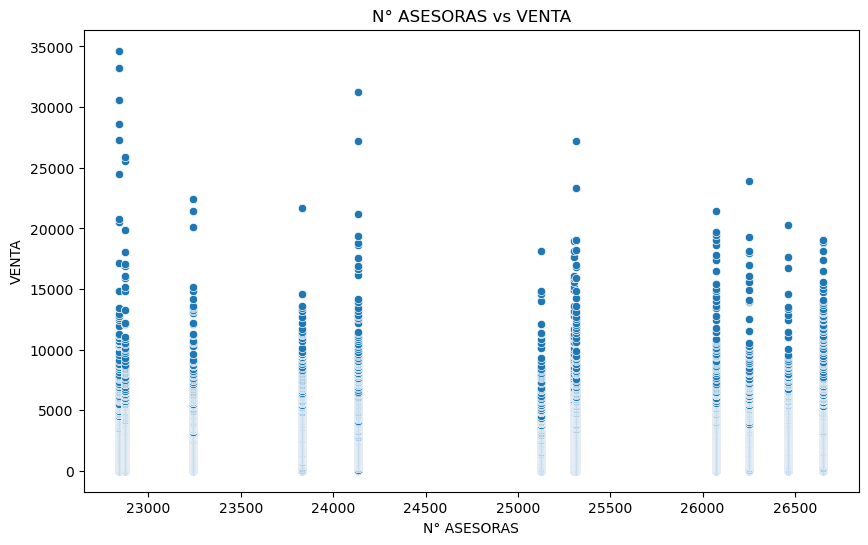

In [44]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
plt.figure(figsize=(10, 6))
feature2='VENTA'
feature1='N° ASESORAS'
sns.scatterplot(x=feature1, y=feature2, data=df)
plt.title(f"{feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


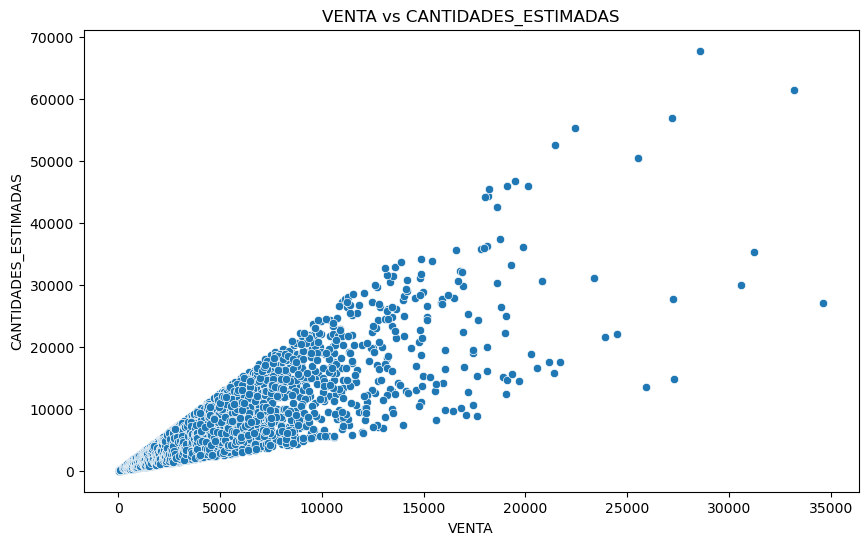

In [45]:
plt.figure(figsize=(10, 6))
feature1='VENTA'
feature2='CANTIDADES_ESTIMADAS'
sns.scatterplot(x=feature1, y=feature2, data=df)
plt.title(f"{feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


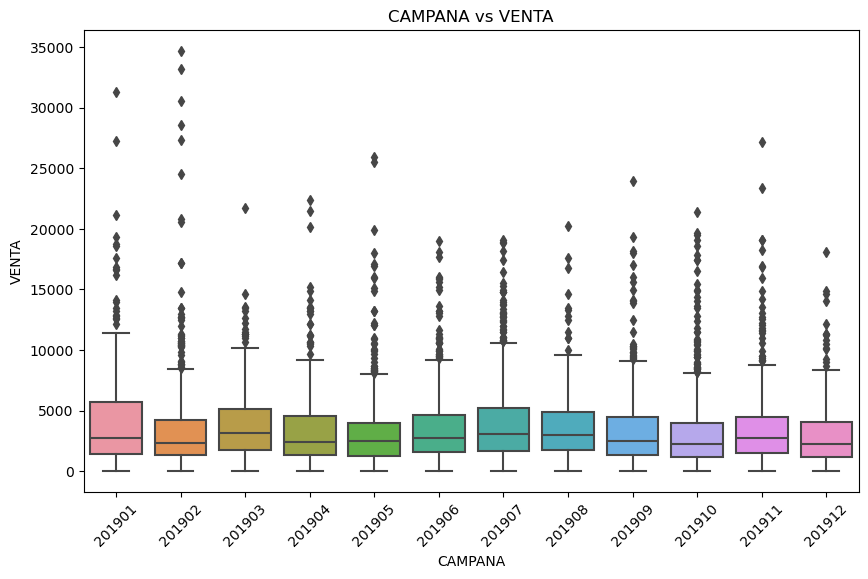

In [48]:
plt.figure(figsize=(10, 6))
feature1='CAMPANA'
feature2='VENTA'
sns.boxplot(x=feature1, y=feature2, data=df)
plt.title(f"{feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.xticks(rotation=45)
plt.show()

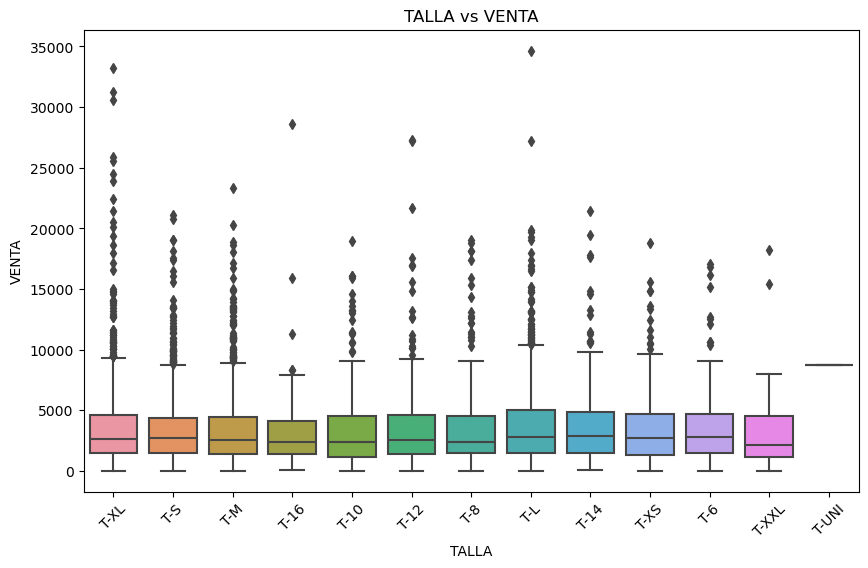

In [49]:
plt.figure(figsize=(10, 6))
feature1='TALLA'
feature2='VENTA'
sns.boxplot(x=feature1, y=feature2, data=df)
plt.title(f"{feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.xticks(rotation=45)
plt.show()

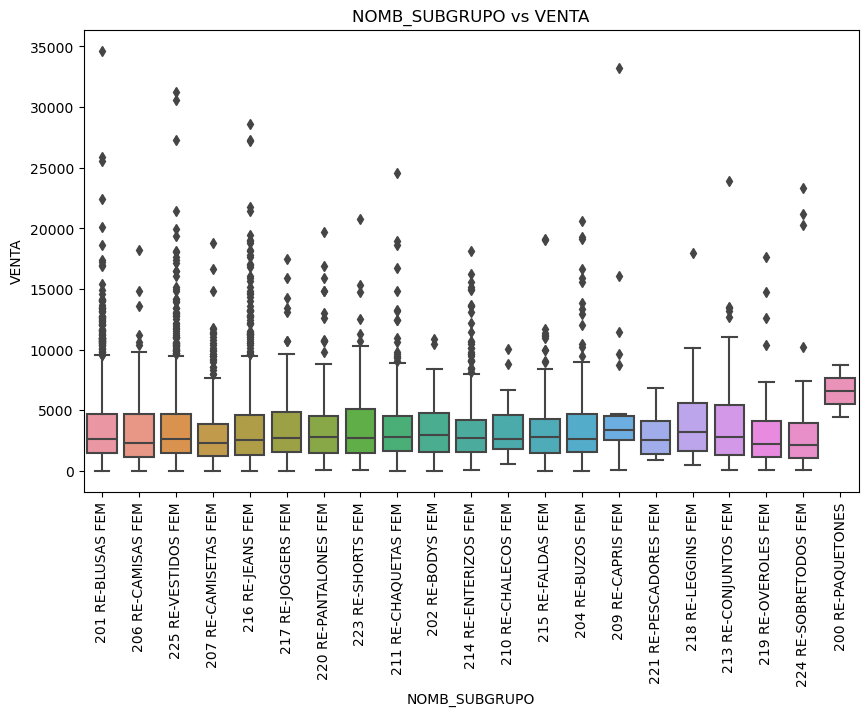

In [ ]:
plt.figure(figsize=(10, 6))
feature1='NOMB_SUBGRUPO'
feature2='VENTA'
sns.boxplot(x=feature1, y=feature2, data=df)
plt.title(f"{feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.xticks(rotation=90)
plt.show()

In [58]:
dfprueba=df.groupby(["NOMB_SUBGRUPO"])["VENTA"].mean().reset_index(name="mean")
dfprueba

,NOMB_SUBGRUPO,mean
0,200 RE-PAQUETONES,6584.500000
1,201 RE-BLUSAS FEM,3583.088814
2,202 RE-BODYS FEM,3473.245283
3,204 RE-BUZOS FEM,3659.811060
4,206 RE-CAMISAS FEM,3612.463918
5,207 RE-CAMISETAS FEM,3209.050000
6,209 RE-CAPRIS FEM,5454.583333
7,210 RE-CHALECOS FEM,3204.538462
8,211 RE-CHAQUETAS FEM,3610.655290
9,213 RE-CONJUNTOS FEM,3767.588235


In [62]:
dfprueba=df.groupby(["TALLA"])["VENTA"].mean().reset_index(name="mean")
dfprueba

,TALLA,mean
0,T-10,3356.258503
1,T-12,3756.979239
2,T-14,3699.914089
3,T-16,3224.175182
4,T-6,3752.671141
5,T-8,3662.855172
6,T-L,3755.970837
7,T-M,3433.512987
8,T-S,3449.937207
9,T-UNI,8716.000000


### **Insights del Análisis Univariado y Bivariado**

#### **Paso 3: Análisis Univariado**

1. **Distribución de Ventas (Variable Numérica)**:
   - **Insight**: La distribución de `VENTA` está fuertemente sesgada a la derecha, con la mayoría de las ventas entre 0 y 7000. La mayor frecuencia se encuentra alrededor de los 2000.
   - **Implicación**: Este sesgo sugiere que la mayoría de las ventas son bajas, mientras que hay algunas ventas muy altas que generan una cola larga a la derecha. Esto podría requerir una transformación logarítmica para normalizar la distribución y mejorar el modelado.

2. **Distribución de TALLA (Variable Categórica)**:
   - **Insight**: La variable `TALLA` presenta una distribución variada, con `T-M` como la más común, seguida de `T-S` y `T-L`. Algunas tallas tienen muy pocas ventas.
   - **Implicación**: La alta frecuencia de ciertas tallas indica que pueden influir significativamente en las ventas. Las tallas con menos observaciones podrían requerir un manejo especial para evitar el sobreajuste, utilizando técnicas como codificación por frecuencia o agrupación de categorías similares.

3. **Distribución de CAMPANA (Variable Categórica)**:
   - **Insight**: La variable `CAMPANA` muestra una distribución uniforme, con `201912` como la campaña con menor cantidad de productos.
   - **Implicación**: La cantidad de productos en cada campaña parece mantenerse estable, pero la baja cantidad en `201912` podría requerir un manejo especial para evitar sesgos en el modelo.

4. **Distribución de NOMB_SUBGRUPO (Variable Categórica)**:
   - **Insight**: La variable `NOMB_SUBGRUPO` tiene una distribución variada, con `201 RE-BLUSAS FEM` como el grupo más común, seguido de `216 RE-JEANS FEM` y `225 RE-VESTIDOS FEM`.
   - **Implicación**: La alta frecuencia de ciertos subgrupos indica que pueden ser determinantes en las ventas. Subgrupos con pocas observaciones podrían necesitar ser agrupados para evitar problemas de sobreajuste en el modelo.

#### **Paso 4: Análisis Bivariado**

1. **Relación entre VENTA y CANTIDADES_ESTIMADAS (Numérica vs. Numérica)**:
   - **Insight**: Existe una fuerte correlación positiva entre `VENTA` y `CANTIDADES_ESTIMADAS`.
   - **Implicación**: Esta relación lineal indica que las estimaciones realizadas por el área de mercadeo pueden ser una buena referencia para predecir las ventas.

2. **Relación entre CAMPANA y VENTA (Categórica vs. Numérica)**:
   - **Insight**: No se observa una relación clara entre `VENTA` y `CAMPANA`.
   - **Implicación**: Parece que la cantidad de productos en cada campaña no influye directamente en las ventas. Sin embargo, la gran cantidad de valores atípicos indica que deberán manejarse cuidadosamente para evitar el sobreajuste.

3. **Relación entre TALLA y VENTA (Categórica vs. Numérica)**:
   - **Insight**: No se observa una relación clara entre `VENTA` y `TALLA`.
   - **Implicación**: La talla de los productos no parece afectar directamente las ventas, pero los valores atípicos deben manejarse adecuadamente para mejorar la robustez del modelo.

4. **Relación entre NOMB_SUBGRUPO y VENTA (Categórica vs. Numérica)**:
   - **Insight**: No se observa una relación clara entre `VENTA` y `NOMB_SUBGRUPO`.
   - **Implicación**: La cantidad de productos en cada subgrupo no parece influir directamente en las ventas, pero la presencia de valores atípicos indica que deben tratarse con cuidado.

### **Resumen**:
- **Predictores Clave**: La variable `CANTIDADES_ESTIMADAS` muestra una fuerte relación con `VENTA`, por lo que debe ser priorizada en el modelado.
- **Distribución de Datos**: La asimetría en `VENTA` y la gran variabilidad en las cantidades estimadas requieren preprocesamiento cuidadoso, incluyendo posibles transformaciones para normalizar los datos.
- **Valores Atípicos**: Se identificaron valores atípicos en varias relaciones, los cuales deben analizarse detalladamente, ya que podrían representar situaciones especiales que sesguen el modelo si no se manejan correctamente.


In [64]:
df.columns

Index(['CAMPANA', 'CODIGO_DEL_PRODUCTO', 'VENTA', 'VENTA_ZONA_101',
       'VENTA_ZONA_102', 'VENTA_ZONA_103', 'VENTA_ZONA_104', 'VENTA_ZONA_107',
       'VENTA_ZONA_109', 'VENTA_ZONA_110', 'VENTA_ZONA_111', 'VENTA_ZONA_112',
       'VENTA_ZONA_115', 'VENTA_ZONA_116', 'VENTA_ZONA_119', 'NOMB_SUBGRUPO',
       'TALLA', 'PRECIO_NAC', 'CANTIDADES_ESTIMADAS', 'N° ASESORAS_ZONA_101',
       'N° ASESORAS_ZONA_102', 'N° ASESORAS_ZONA_103', 'N° ASESORAS_ZONA_104',
       'N° ASESORAS_ZONA_107', 'N° ASESORAS_ZONA_109', 'N° ASESORAS_ZONA_110',
       'N° ASESORAS_ZONA_111', 'N° ASESORAS_ZONA_112', 'N° ASESORAS_ZONA_115',
       'N° ASESORAS_ZONA_116', 'N° ASESORAS_ZONA_119', 'N° ASESORAS'],
      dtype='object')

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


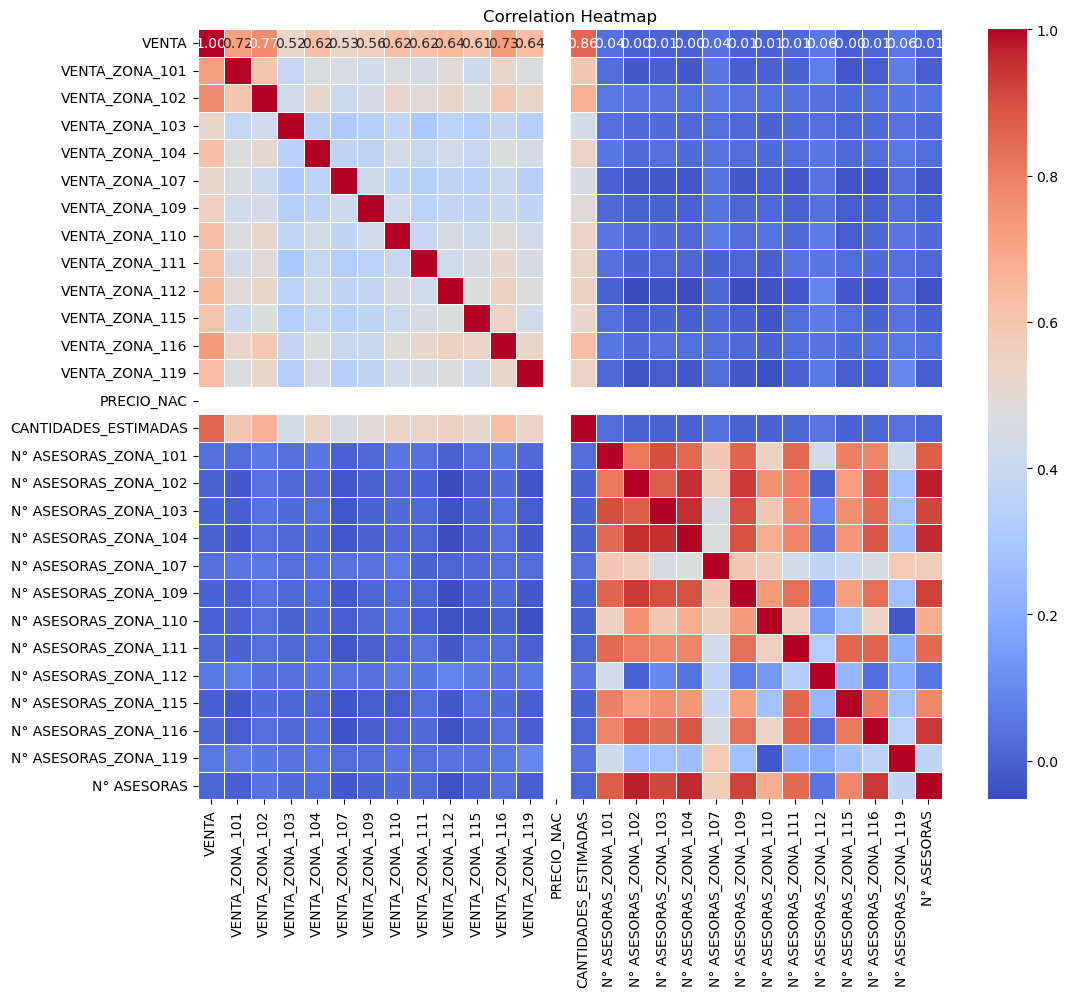

In [71]:
plt.figure(figsize=(12, 10))
dfc=df[['VENTA', 'VENTA_ZONA_101',
       'VENTA_ZONA_102', 'VENTA_ZONA_103', 'VENTA_ZONA_104', 'VENTA_ZONA_107',
       'VENTA_ZONA_109', 'VENTA_ZONA_110', 'VENTA_ZONA_111', 'VENTA_ZONA_112',
       'VENTA_ZONA_115', 'VENTA_ZONA_116', 'VENTA_ZONA_119',
       'PRECIO_NAC', 'CANTIDADES_ESTIMADAS', 'N° ASESORAS_ZONA_101',
       'N° ASESORAS_ZONA_102', 'N° ASESORAS_ZONA_103', 'N° ASESORAS_ZONA_104',
       'N° ASESORAS_ZONA_107', 'N° ASESORAS_ZONA_109', 'N° ASESORAS_ZONA_110',
       'N° ASESORAS_ZONA_111', 'N° ASESORAS_ZONA_112', 'N° ASESORAS_ZONA_115',
       'N° ASESORAS_ZONA_116', 'N° ASESORAS_ZONA_119', 'N° ASESORAS']]
sns.heatmap(dfc.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout
plt.show()